# Data Loading

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.manifold import TSNE

## Import, Load and Display Dataset

In [ ]:
# Define file path
speech_features_path = '/content/pd_speech_features_removedRowOne.csv'

# Load dataset
speech_features_df = pd.read_csv(speech_features_path)

# Display the first few rows of each dataset to verify they were loaded correctly
print("\nSpeech Features Dataset:")
print(speech_features_df.head())

# Optional: Display basic information about the datasets
print("\nSpeech Features Dataset Info:")
print(speech_features_df.info())


Speech Features Dataset:
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                

# Data Preprocessing

## Check for null/missing values

In [ ]:
# Check for missing data
print("\nMissing Data in Speech Features Dataset:")
print(speech_features_df.isnull().sum())


Missing Data in Speech Features Dataset:
id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64


## Check for non-numeric values

In [ ]:
# Check for non-numeric values in each column
non_numeric_columns = []
for col in speech_features_df.columns:
    if not pd.api.types.is_numeric_dtype(speech_features_df[col]):
        non_numeric_columns.append(col)

# Print columns with non-numeric values and their counts
print("Columns with non-numeric values:", len(non_numeric_columns))

Columns with non-numeric values: 0


## Check for duplicated values

In [ ]:
# Check for duplicate data
print("\nDuplicate Rows in Speech Feature Dataset:")
print(speech_features_df.duplicated().sum())



Duplicate Rows in Speech Feature Dataset:
1


##Check for constant features

In [ ]:
# Check for constant features
constant_features = [col for col in speech_features_df.columns if speech_features_df[col].nunique() == 1]
print(f"Constant features: {constant_features}")



Constant features: []


##Check for outliers

In [ ]:
# Check for outliers using IQR (Interquartile Range) method
def detect_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.025)
        Q3 = df[column].quantile(0.975)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
        outliers[column] = df[column][outlier_mask]

    # Count total number of outliers
    total_outliers = outliers.count().sum()

    return outliers, total_outliers

outliers, total_outliers = detect_outliers(speech_features_df)

print("\nOutliers in Speech Features Dataset:")
print(outliers)
print(f"\nTotal number of outliers: {total_outliers}")


Outliers in Speech Features Dataset:
     id  gender  PPE  DFA  RPDE  numPulses  numPeriodsPulses  \
425 NaN     NaN  NaN  NaN   NaN        NaN               NaN   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
425               NaN                 NaN       0.02775  ...   

     tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_36  class  
425                        NaN    NaN  

[1 rows x 755 columns]

Total number of outliers: 13


#Data Cleaning

##Handle Non-predictor Column

In [ ]:
# Drop ID Column
speech_features_df.drop(['id'], axis=1, inplace=True)
print(speech_features_df.head())

   gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0       1  0.85247  0.71826  0.57227        240               239   
1       1  0.76686  0.69481  0.53966        234               233   
2       1  0.85083  0.67604  0.58982        232               231   
3       0  0.41121  0.79672  0.59257        178               177   
4       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0          0.008064            0.000087       0.00218      0.000018  ...   
1          0.008258            0.000073       0.00195      0.000016  ...   
2          0.008340            0.000060       0.00176      0.000015  ...   
3          0.010858            0.000183       0.00419      0.000046  ...   
4          0.008162            0.002669       0.00535      0.000044  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1         

##Handle Duplicated Rows

In [ ]:
num_duplicates = speech_features_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Handle duplicates by removing them
if num_duplicates > 0:
    speech_features_df_cleaned = speech_features_df.drop_duplicates()
    print(f"Removed {num_duplicates} duplicate rows. New dataset shape: {speech_features_df_cleaned.shape}")
else:
    print("No duplicates found. No rows removed.")

Number of duplicated rows: 1
Removed 1 duplicate rows. New dataset shape: (755, 754)


## Handle Outliers

In [ ]:
def handle_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.025)
        Q3 = df[column].quantile(0.975)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower_bound, upper_bound)
    return df

print("\nOutliers in Speech Features Dataset:")
outliers, total_outliers = detect_outliers(speech_features_df)
print(outliers)
print(f"\nTotal number of outliers: {total_outliers}")

# Handling outliers by capping
speech_features_df_no_outliers = handle_outliers(speech_features_df_cleaned)

speech_features_df_raw = speech_features_df_no_outliers

print("\nData after handling outliers:")
print(speech_features_df_no_outliers.describe())


Outliers in Speech Features Dataset:
     gender  PPE  DFA  RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  \
425     NaN  NaN  NaN   NaN        NaN               NaN               NaN   

     stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
425                 NaN       0.02775      0.000256  ...   

     tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
425                        NaN                        NaN   

     tqwt_kurtosisValue_dec_36  class  
425                        NaN    NaN  

[1 rows x 754 columns]

Total number of outliers: 13


<ipython-input-10-e52aa1753abf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower_bound, upper_bound)
<ipython-input-10-e52aa1753abf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower_bound, upper_bound)
<ipython-input-10-e52aa1753abf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd


Data after handling outliers:
           gender         PPE         DFA        RPDE   numPulses  \
count  755.000000  755.000000  755.000000  755.000000  755.000000   
mean     0.516556    0.746225    0.700567    0.488854  323.976159   
std      0.500057    0.169398    0.069637    0.137420   99.284774   
min      0.000000    0.041551    0.543500    0.154300    2.000000   
25%      0.000000    0.762765    0.647335    0.386325  251.000000   
50%      1.000000    0.809730    0.700690    0.484100  317.000000   
75%      1.000000    0.834400    0.754990    0.585545  384.500000   
max      1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        755.000000        755.000000          755.000000    755.000000   
mean         322.682119          0.006360            0.000383      0.002318   
std           99.468346          0.001828            0.000728      0.002569   
min            1.000000        

#Exploratory Data Analysis

##Summary of Statistics

In [ ]:
print(speech_features_df_no_outliers.describe())

           gender         PPE         DFA        RPDE   numPulses  \
count  755.000000  755.000000  755.000000  755.000000  755.000000   
mean     0.516556    0.746225    0.700567    0.488854  323.976159   
std      0.500057    0.169398    0.069637    0.137420   99.284774   
min      0.000000    0.041551    0.543500    0.154300    2.000000   
25%      0.000000    0.762765    0.647335    0.386325  251.000000   
50%      1.000000    0.809730    0.700690    0.484100  317.000000   
75%      1.000000    0.834400    0.754990    0.585545  384.500000   
max      1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        755.000000        755.000000          755.000000    755.000000   
mean         322.682119          0.006360            0.000383      0.002318   
std           99.468346          0.001828            0.000728      0.002569   
min            1.000000          0.002107            0.000011 

##Temporary Feature Selection

In [ ]:
# Step 1: Compute the correlation matrix
correlation_matrix = speech_features_df_no_outliers.corr()

# Step 2: Extract the correlation values of each feature with the target variable
target_correlation = correlation_matrix['class'].abs()

# Step 3: Set a threshold correlation value (e.g., 0.1) to select features
threshold = 0.3
selected_features = target_correlation[target_correlation > threshold].index.tolist()

# Exclude the target variable itself from the selected features
selected_features.remove('class')

# Output the selected features
print("Selected features based on correlation threshold:", selected_features)

# Number of columns left after feature selection
number_of_columns_left = len(selected_features)
print("Number of columns left after feature selection:", number_of_columns_left)

# Optional: Create a new DataFrame with only the selected features
selected_speech_features_df = speech_features_df_no_outliers[selected_features]

print(selected_speech_features_df.head())

Selected features based on correlation threshold: ['DFA', 'mean_MFCC_2nd_coef', 'std_6th_delta', 'std_7th_delta', 'std_8th_delta', 'std_9th_delta', 'std_10th_delta', 'std_11th_delta', 'std_delta_delta_log_energy', 'std_6th_delta_delta', 'std_7th_delta_delta', 'std_8th_delta_delta', 'std_9th_delta_delta', 'std_10th_delta_delta', 'std_11th_delta_delta', 'std_12th_delta_delta', 'tqwt_energy_dec_11', 'tqwt_energy_dec_12', 'tqwt_energy_dec_13', 'tqwt_energy_dec_15', 'tqwt_entropy_shannon_dec_11', 'tqwt_entropy_shannon_dec_12', 'tqwt_entropy_shannon_dec_13', 'tqwt_entropy_shannon_dec_14', 'tqwt_entropy_shannon_dec_15', 'tqwt_entropy_shannon_dec_16', 'tqwt_entropy_shannon_dec_17', 'tqwt_entropy_log_dec_11', 'tqwt_entropy_log_dec_12', 'tqwt_entropy_log_dec_13', 'tqwt_entropy_log_dec_15', 'tqwt_entropy_log_dec_16', 'tqwt_TKEO_mean_dec_11', 'tqwt_TKEO_mean_dec_12', 'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12', 'tqwt_TKEO_std_dec_13', 'tqwt_stdValue_dec_7', 'tqwt_stdValue_dec_10', 'tqwt_stdValu

##Histograms

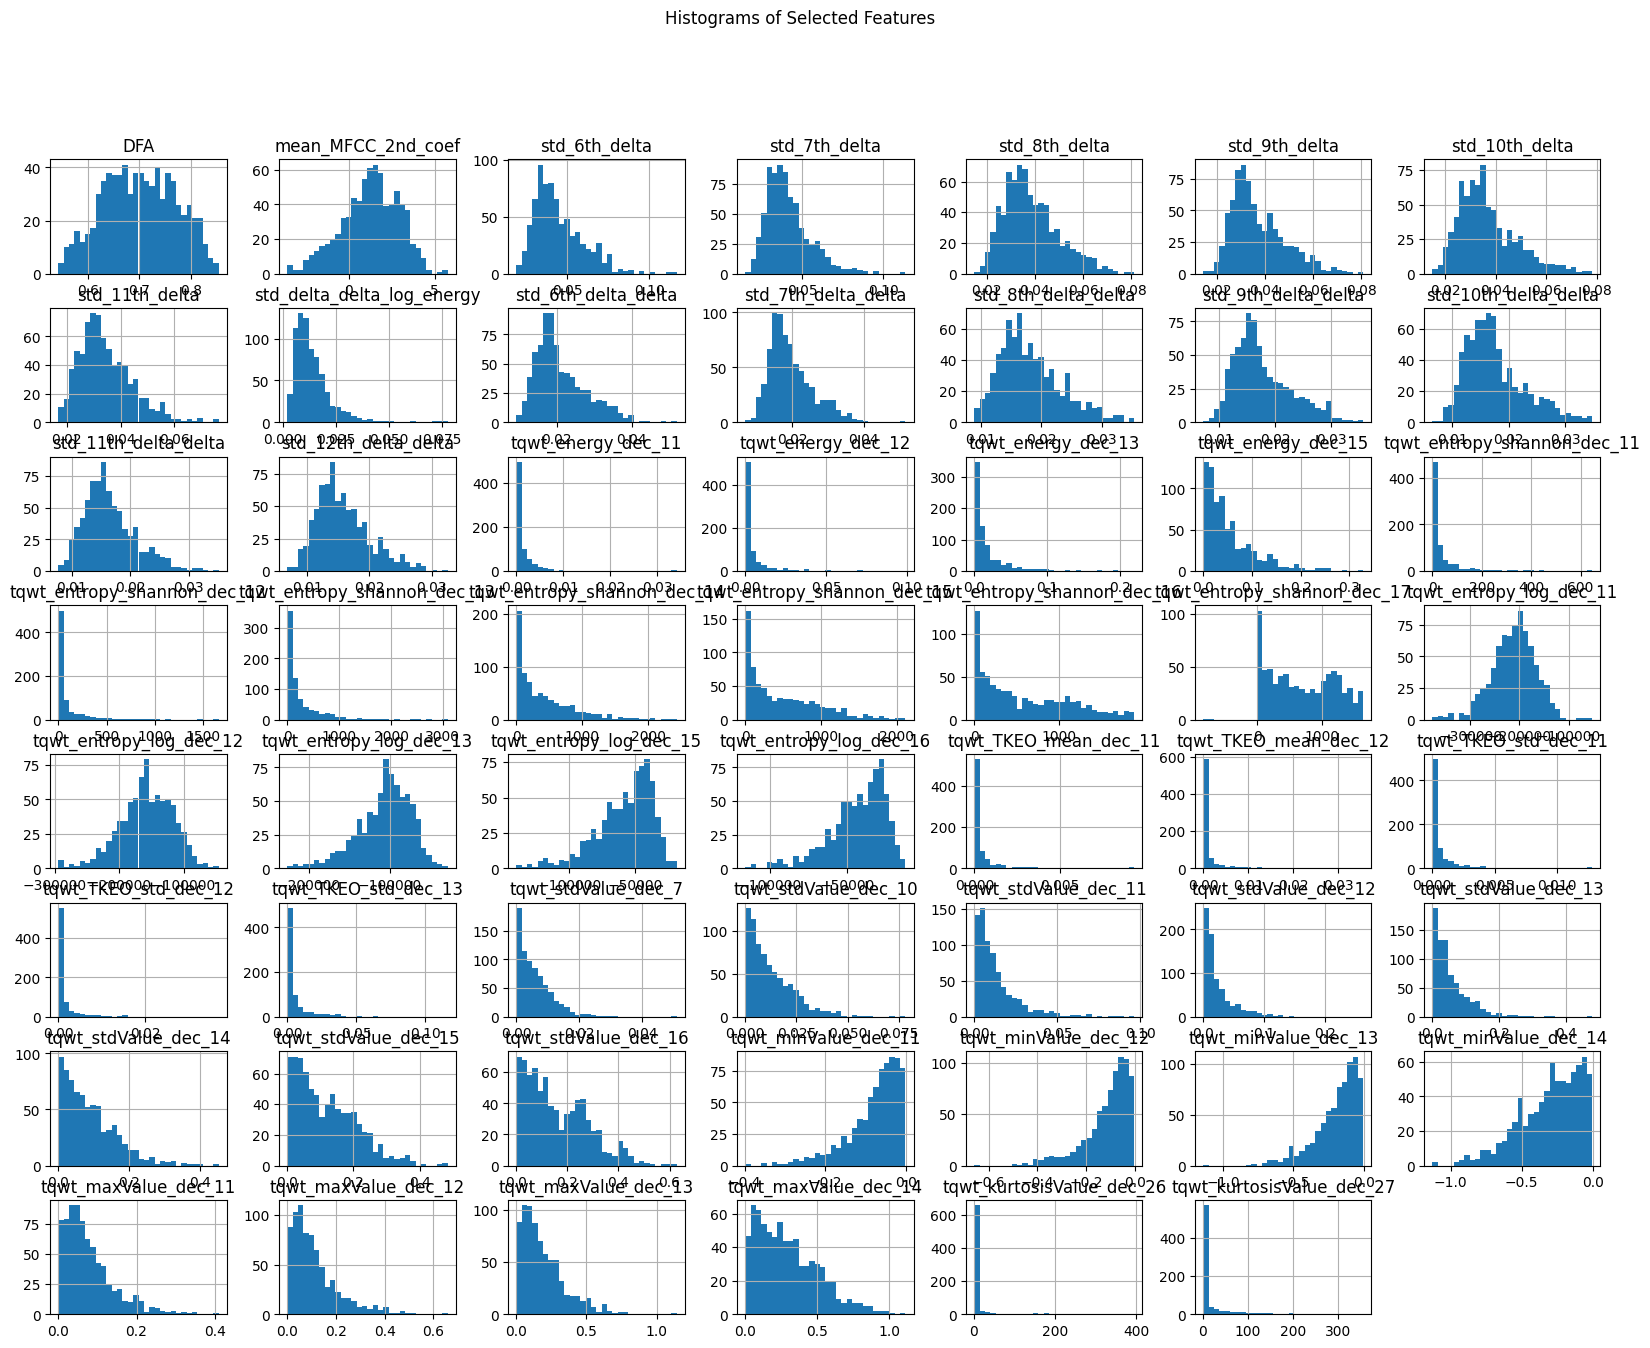

In [ ]:
# Histograms
selected_speech_features_df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of Selected Features')
plt.show()


##Box Plots

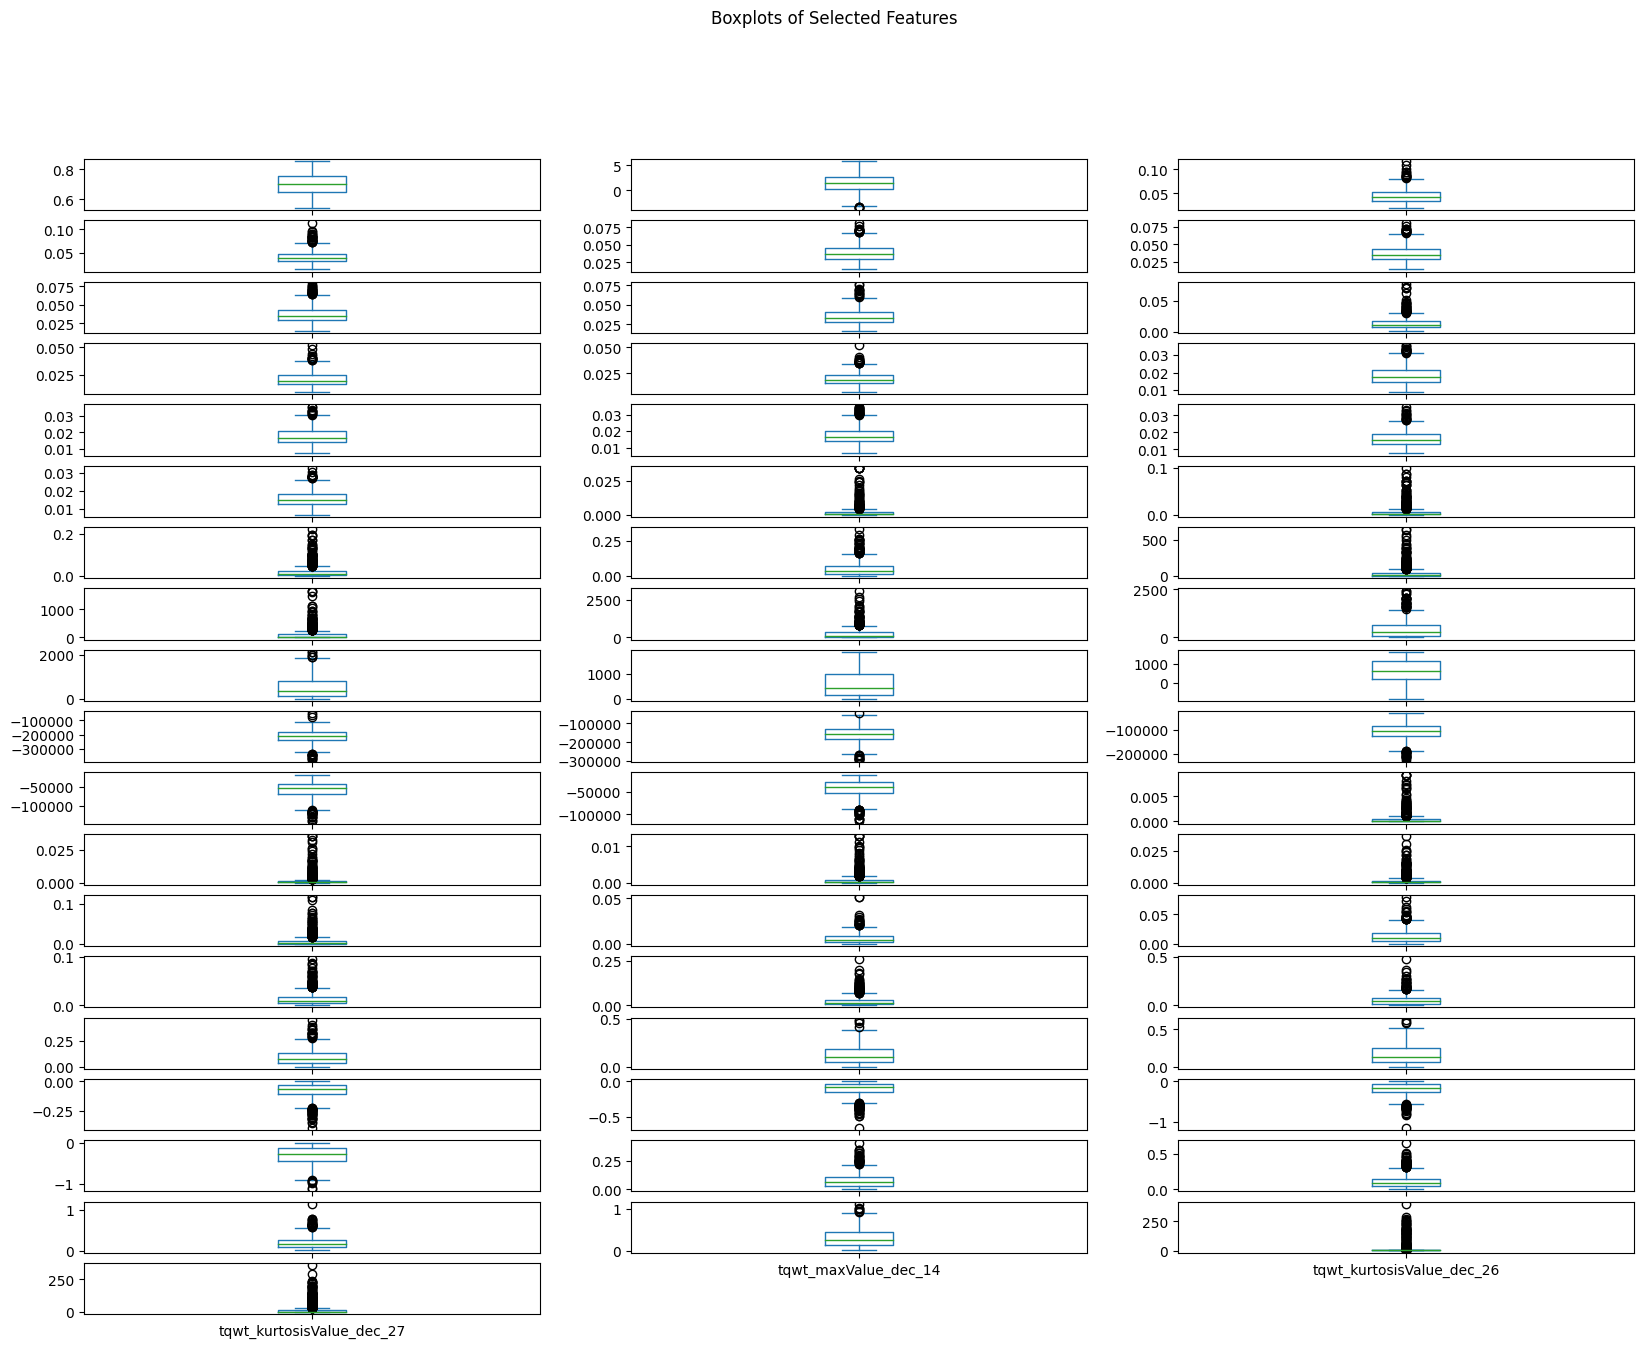

In [ ]:
# Boxplots
selected_speech_features_df.plot(kind='box', subplots=True, layout=(int(len(selected_features)/3)+1, 3), figsize=(20, 15), sharex=False, sharey=False)
plt.suptitle('Boxplots of Selected Features')
plt.show()

##Heat Map

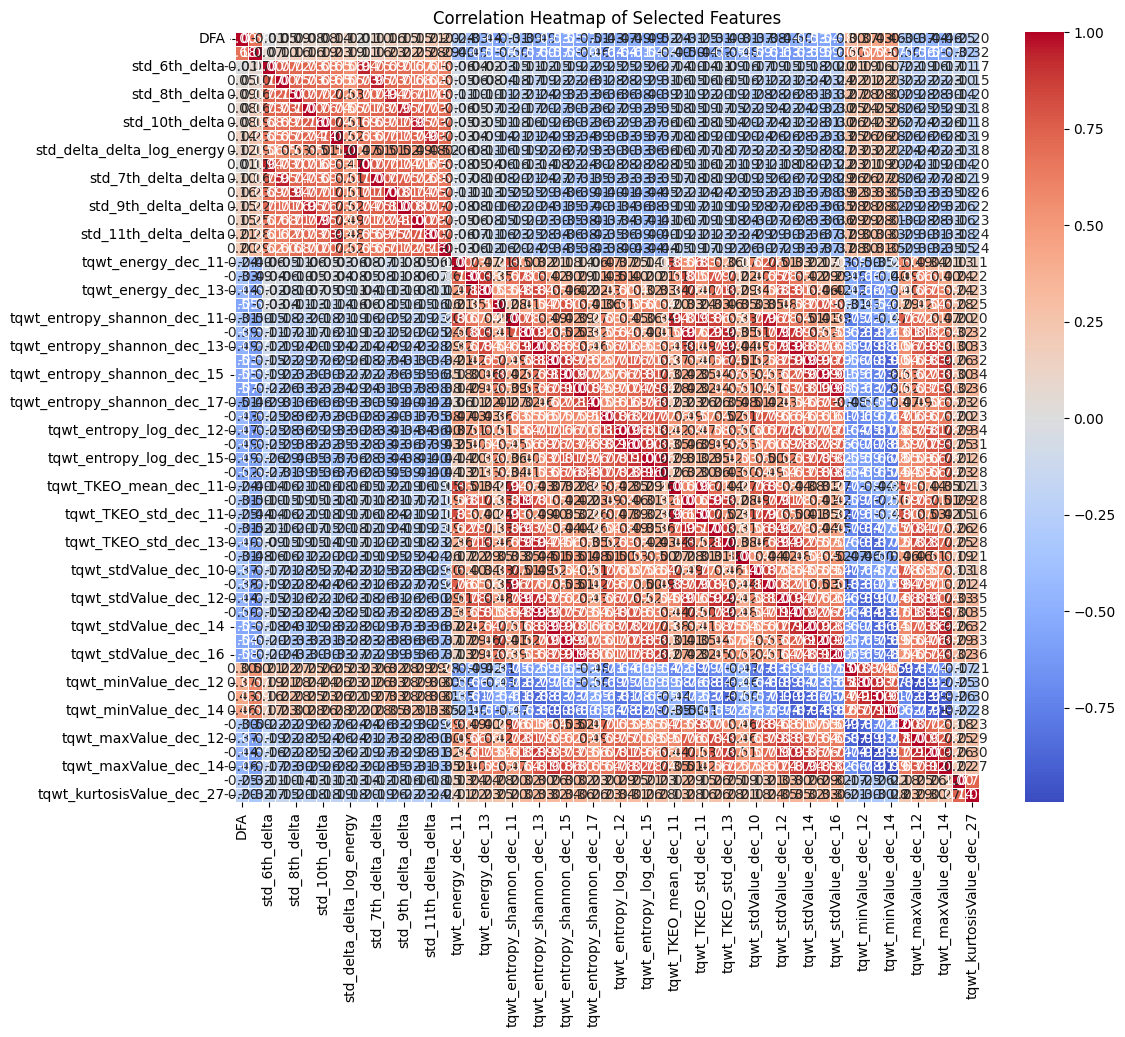

In [ ]:
# Correlation analysis and heatmap
selected_correlation_matrix = selected_speech_features_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

#Data Transformation

##Standardize Dataset

In [ ]:
# Isolate the target column
target_column = 'class'
target = speech_features_df_raw[target_column]

# Isolate the gender column
gender_column = 'gender'
gender = speech_features_df_raw[gender_column]

# Isolate the feature columns excluding target and gender
features = speech_features_df_raw.drop(columns=[target_column, gender_column])

# Standardize the feature columns using StandardScaler
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Convert the standardized features back to a DataFrame
standardized_features_df = pd.DataFrame(standardized_features, columns=features.columns)

# Add the gender column back to the DataFrame
standardized_features_df[gender_column] = gender.values

# Add the target column back to the DataFrame
standardized_features_df[target_column] = target.values

# Display the first few rows of the standardized dataset
print("\nStandardized Speech Features Dataset:")
print(standardized_features_df.head())

# Display basic information about the standardized dataset
print("\nStandardized Speech Features Dataset Info:")
print(standardized_features_df.info())



Standardized Speech Features Dataset:
        PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
0  0.627605  0.254241  0.607415  -0.846372         -0.841852   
1  0.121892 -0.082731  0.369956  -0.906844         -0.902212   
2  0.617917 -0.352452  0.735211  -0.927001         -0.922333   
3 -1.978992  1.381694  0.755236  -1.471252         -1.465579   
4 -2.471119  1.397501  0.301653  -0.886687         -0.882092   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  \
0          0.932476           -0.407447     -0.053701      0.041986   
1          1.039095           -0.426276     -0.143284     -0.025526   
2          1.083628           -0.443731     -0.217288     -0.088538   
3          2.462389           -0.275590      0.729184      1.297714   
4          0.986158            3.141307      1.180997      1.216700   

   rapJitter  ...  tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0   0.076567  ...                  -0.619902                  -0.577334   

#Model Training

##Supervised Learning

###Train-Test Split

In [ ]:
X = standardized_features_df.drop('class', axis=1)  # Features
y = standardized_features_df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Train and Test sets for Parkinsons Disease Dataset:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of Train and Test sets for Parkinsons Disease Dataset:
X_train shape: (604, 753)
X_test shape: (151, 753)
y_train shape: (604,)
y_test shape: (151,)


###Checking Imbalance

Training set class distribution:
 class
1    457
0    147
Name: count, dtype: int64
Training set imbalance ratio: 0.32


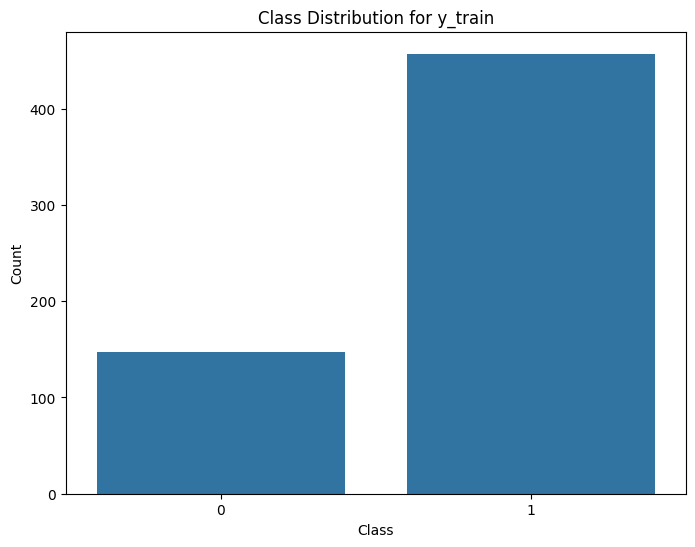

In [ ]:
# Training set class distribution
y_train_counts = y_train.value_counts()
print("Training set class distribution:\n", y_train_counts)

# Imbalance ratio in training set
train_majority_class_count = y_train_counts.max()
train_minority_class_count = y_train_counts.min()
train_imbalance_ratio = train_minority_class_count / train_majority_class_count
print(f'Training set imbalance ratio: {train_imbalance_ratio:.2f}')

# Plot class distribution for y_train
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution for y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

###Handling Imbalance

Training set class distribution:
 class
1    457
0    457
Name: count, dtype: int64
Training set imbalance ratio: 1.00


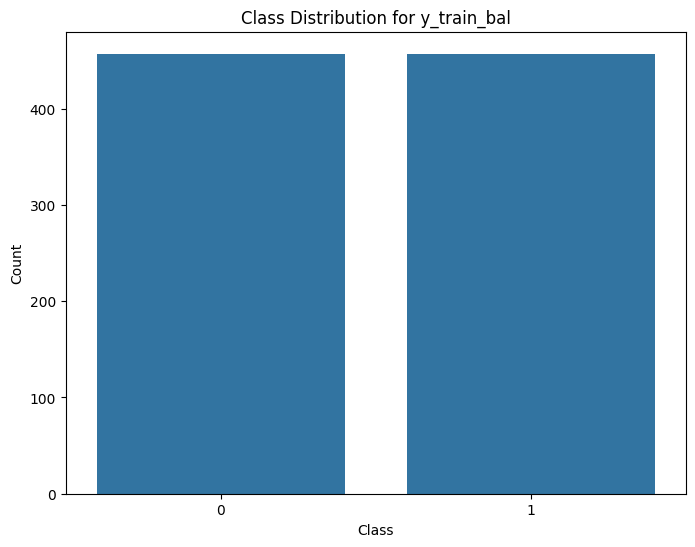

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Training set class distribution
y_train_bal_counts = y_train_bal.value_counts()
print("Training set class distribution:\n", y_train_bal_counts)

# Imbalance ratio in training set
train_bal_majority_class_count = y_train_bal_counts.max()
train_bal_minority_class_count = y_train_bal_counts.min()
train_bal_imbalance_ratio = train_bal_minority_class_count / train_bal_majority_class_count
print(f'Training set imbalance ratio: {train_bal_imbalance_ratio:.2f}')

# Plot class distribution for y_train_bal
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_bal)
plt.title('Class Distribution for y_train_bal')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

###Feature Selection

#### Correlation (Without SMOTE)

In [ ]:
import numpy as np
import pandas as pd

# Calculate the correlation of each feature with the target
correlation_with_target = X_train.apply(lambda x: x.corr(y_train))

# Select features with correlation greater than or equal to 0.2
selected_features = correlation_with_target[correlation_with_target.abs() >= 0.2].index
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

# Calculate the correlation matrix
correlation_matrix = X_train_filtered.corr().abs()

# Select the upper triangle of the correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = set()
for column in upper.columns:
    # Find all features correlated with 'column' and form a group
    group = [column]
    for index in upper.index:
        if upper.loc[index, column] > 0.9:
            group.append(index)

    # If there are features to compare in the group
    if len(group) > 1:
        # Sort features in the group by their correlation with the target
        group.sort(key=lambda x: np.abs(correlation_with_target[x]), reverse=True)
        # Keep the feature with the highest correlation with the target and drop the rest
        to_drop.update(group[1:])

# Drop these features
X_train_final = X_train_filtered.drop(columns=to_drop)
X_test_final = X_test_filtered.drop(columns=to_drop)

print("Final Training set:\n", X_train_final)
print("Final Test set:\n", X_test_final)

Final Training set:
           DFA      RPDE  numPeriodsPulses  locPctJitter  apq11Shimmer  \
69   0.307840 -0.247030         -0.912272      0.031988     -0.552462   
265  1.427103  0.087932         -1.314677      0.047568      0.023571   
131 -0.941182 -1.066887         -0.409267     -0.302977     -0.325584   
44   0.935943 -0.861686          0.767767     -0.357506     -0.600489   
70   0.983938 -0.274337         -0.922333     -0.053701      0.245440   
..        ...       ...               ...           ...           ...   
71   1.024461  1.007477         -0.932393      0.370849      0.539792   
106 -0.365672 -0.855642          0.918668     -0.606783     -0.893073   
270 -1.053985  1.622060         -1.012874      3.895774     -0.222164   
435 -1.246827 -0.737677          0.244641     -0.330242     -0.901913   
102  0.453837 -0.062364          0.566564     -0.264028      0.229529   

     meanHarmToNoiseHarmonicity  minIntensity        f1        f2  \
69                    -0.321841  

#### Correlation (SMOTE)

In [ ]:
# Calculate the correlation of each feature with the target
correlation_bal_with_target = X_train_bal.apply(lambda x: x.corr(y_train_bal))

# Select features with correlation greater than or equal to 0.2
selected_bal_features = correlation_bal_with_target[correlation_bal_with_target.abs() >= 0.2].index
X_train_bal_filtered = X_train_bal[selected_bal_features]
X_test_bal_filtered = X_test[selected_bal_features]

# Calculate the correlation matrix
correlation_bal_matrix = X_train_bal_filtered.corr().abs()

# Select the upper triangle of the correlation matrix
upper_bal = correlation_bal_matrix.where(np.triu(np.ones(correlation_bal_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop_bal = set()
for column in upper_bal.columns:
    # Find all features correlated with 'column' and form a group
    group_bal = [column]
    for index in upper_bal.index:
        if upper_bal.loc[index, column] > 0.9:
            group_bal.append(index)

    # If there are features to compare in the group
    if len(group_bal) > 1:
        # Sort features in the group by their correlation with the target
        group_bal.sort(key=lambda x: np.abs(correlation_bal_with_target[x]), reverse=True)
        # Keep the feature with the highest correlation with the target and drop the rest
        to_drop_bal.update(group_bal[1:])

# Drop these features
X_train_bal_final = X_train_bal_filtered.drop(columns=to_drop_bal)
X_test_bal_final = X_test_bal_filtered.drop(columns=to_drop_bal)

print("Balanced Final Training set:\n", X_train_bal_final)
print("Balanced Final Test set:\n", X_test_bal_final)

Balanced Final Training set:
           DFA      RPDE  numPeriodsPulses  locPctJitter  apq11Shimmer  \
0    0.307840 -0.247030         -0.912272      0.031988     -0.552462   
1    1.427103  0.087932         -1.314677      0.047568      0.023571   
2   -0.941182 -1.066887         -0.409267     -0.302977     -0.325584   
3    0.935943 -0.861686          0.767767     -0.357506     -0.600489   
4    0.983938 -0.274337         -0.922333     -0.053701      0.245440   
..        ...       ...               ...           ...           ...   
909  0.338343 -0.726357          1.357079     -0.432943      0.319903   
910 -0.875630 -1.090636         -0.137041     -0.436548     -1.108608   
911 -0.157047 -0.671223         -0.511201     -0.414704     -0.387565   
912 -1.430868 -0.066741          0.204177     -0.239619     -0.702202   
913 -1.346191 -1.160911          0.954840     -0.644945     -1.304650   

     meanHarmToNoiseHarmonicity  minIntensity        f1        f2  \
0                     -0

### Training Without SMOTE

####Supervised Model Training without Feature Selection

#####Naive Bayes

In [ ]:
# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred_nb_wofs = gnb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb_wofs))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_nb_wofs))

Confusion Matrix:
[[33 12]
 [23 83]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65        45
           1       0.87      0.78      0.83       106

    accuracy                           0.77       151
   macro avg       0.73      0.76      0.74       151
weighted avg       0.79      0.77      0.77       151


F1 Score:
0.8258706467661692


#####Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression classifier
lr_wofs = LogisticRegression(random_state=42)
lr_wofs.fit(X_train, y_train)

# Make predictions
y_pred_lr_wofs = lr_wofs.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_wofs))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_lr_wofs))

Confusion Matrix:
[[26 19]
 [12 94]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.58      0.63        45
           1       0.83      0.89      0.86       106

    accuracy                           0.79       151
   macro avg       0.76      0.73      0.74       151
weighted avg       0.79      0.79      0.79       151


F1 Score:
0.858447488584475


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####Decision Tree

In [ ]:
# Initialize and train the Decision Tree classifier
dt_wofs = DecisionTreeClassifier(random_state=42)
dt_wofs.fit(X_train, y_train)

# Make predictions
y_pred_dt_wofs = dt_wofs.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_wofs))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_dt_wofs))

Confusion Matrix:
[[29 16]
 [12 94]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        45
           1       0.85      0.89      0.87       106

    accuracy                           0.81       151
   macro avg       0.78      0.77      0.77       151
weighted avg       0.81      0.81      0.81       151


F1 Score:
0.8703703703703703


####Supervised Model Training with Feature Selection

#####Naive Bayes

In [ ]:
# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_final, y_train)

# Make predictions
y_pred_nb = gnb.predict(X_test_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_nb))


Confusion Matrix:
[[34 11]
 [23 83]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        45
           1       0.88      0.78      0.83       106

    accuracy                           0.77       151
   macro avg       0.74      0.77      0.75       151
weighted avg       0.80      0.77      0.78       151


F1 Score:
0.8300000000000001


#####Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_final, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_lr))


Confusion Matrix:
[[30 15]
 [ 8 98]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        45
           1       0.87      0.92      0.89       106

    accuracy                           0.85       151
   macro avg       0.83      0.80      0.81       151
weighted avg       0.84      0.85      0.84       151


F1 Score:
0.8949771689497716


#####Decision Tree

In [ ]:
# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_final, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_dt))

Confusion Matrix:
[[22 23]
 [15 91]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.49      0.54        45
           1       0.80      0.86      0.83       106

    accuracy                           0.75       151
   macro avg       0.70      0.67      0.68       151
weighted avg       0.74      0.75      0.74       151


F1 Score:
0.8272727272727273


### Training With SMOTE

####Supervised Model Training without Feature Selection

#####Naive Bayes

In [ ]:
# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred_bal_nb_wofs = gnb.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_nb_wofs))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_bal_nb_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_nb_wofs))

Confusion Matrix:
[[35 10]
 [30 76]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.78      0.64        45
           1       0.88      0.72      0.79       106

    accuracy                           0.74       151
   macro avg       0.71      0.75      0.71       151
weighted avg       0.78      0.74      0.75       151


F1 Score:
0.7916666666666666


#####Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression classifier
lr_wofs = LogisticRegression(random_state=42)
lr_wofs.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred_bal_lr_wofs = lr_wofs.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_lr_wofs))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_bal_lr_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_lr_wofs))

Confusion Matrix:
[[28 17]
 [13 93]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        45
           1       0.85      0.88      0.86       106

    accuracy                           0.80       151
   macro avg       0.76      0.75      0.76       151
weighted avg       0.80      0.80      0.80       151


F1 Score:
0.861111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#####Decision Tree

In [ ]:
# Initialize and train the Decision Tree classifier
dt_wofs = DecisionTreeClassifier(random_state=42)
dt_wofs.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred_bal_dt_wofs = dt_wofs.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_dt_wofs))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_bal_dt_wofs))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_dt_wofs))

Confusion Matrix:
[[36  9]
 [22 84]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        45
           1       0.90      0.79      0.84       106

    accuracy                           0.79       151
   macro avg       0.76      0.80      0.77       151
weighted avg       0.82      0.79      0.80       151


F1 Score:
0.8442211055276382


####Supervised Model Training with Feature Selection

#####Naive Bayes

In [ ]:
# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_bal_final, y_train_bal)

# Make predictions
y_pred_bal_nb = gnb.predict(X_test_bal_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_nb))

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_bal_nb))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_nb))


Confusion Matrix:
[[36  9]
 [26 80]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.80      0.67        45
           1       0.90      0.75      0.82       106

    accuracy                           0.77       151
   macro avg       0.74      0.78      0.75       151
weighted avg       0.80      0.77      0.78       151


F1 Score:
0.8205128205128206


#####Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal_final, y_train_bal)

# Make predictions
y_pred_bal_lr = lr.predict(X_test_bal_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_lr))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_bal_lr))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_lr))


Confusion Matrix:
[[33 12]
 [21 85]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        45
           1       0.88      0.80      0.84       106

    accuracy                           0.78       151
   macro avg       0.74      0.77      0.75       151
weighted avg       0.80      0.78      0.79       151


F1 Score:
0.8374384236453203


#####Decision Tree

In [ ]:
# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal_final, y_train_bal)

# Make predictions
y_pred_bal_dt = dt.predict(X_test_bal_final)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bal_dt))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_bal_dt))

print("\nF1 Score:")
print(f1_score(y_test, y_pred_bal_dt))

Confusion Matrix:
[[37  8]
 [19 87]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.82      0.73        45
           1       0.92      0.82      0.87       106

    accuracy                           0.82       151
   macro avg       0.79      0.82      0.80       151
weighted avg       0.84      0.82      0.83       151


F1 Score:
0.8656716417910448


##Unsupervised Learning

###Elbow Method for PCA

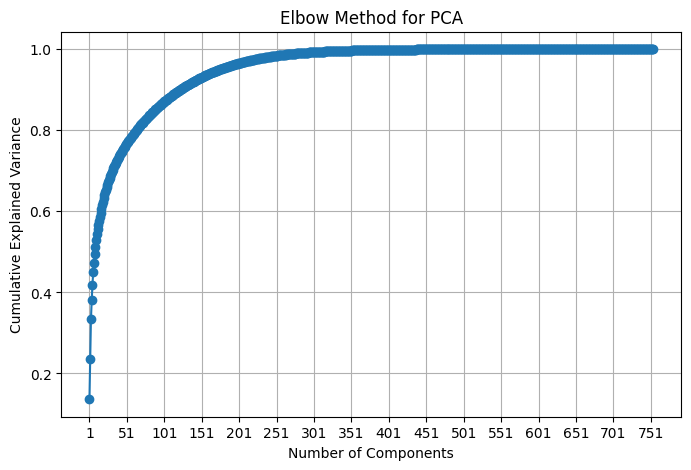

In [ ]:
# Elbow Method for PCA
pca = PCA()
pca.fit(standardized_features_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the Elbow graph for PCA
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Elbow Method for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1, 50))
plt.grid(True)
plt.show()

###Principal Component Analysis

Explained variance by each principal component: [0.13646101 0.09998158]


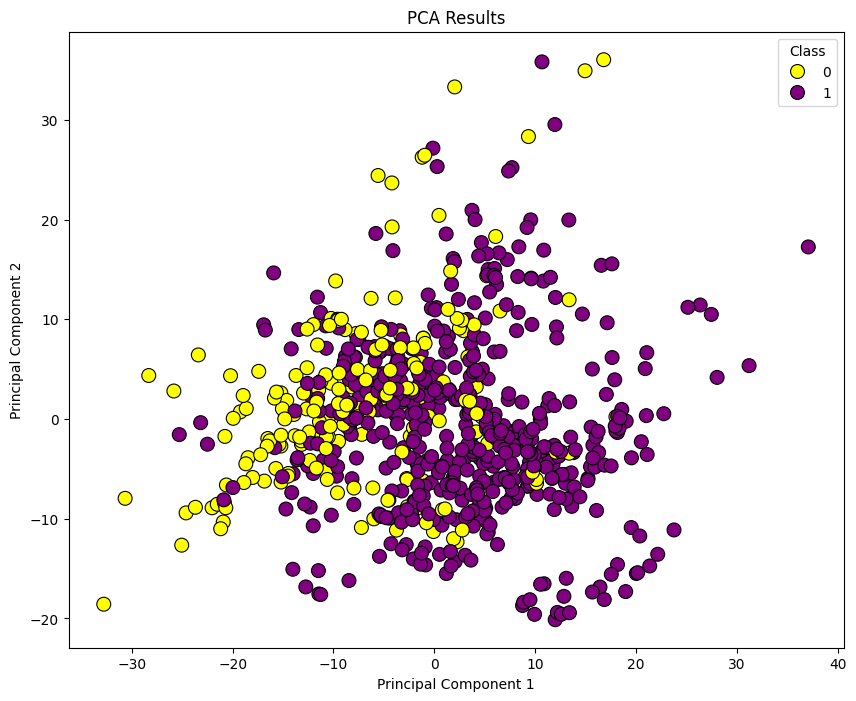

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_features = pca.fit_transform(standardized_features)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df[target_column] = target.values

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Plot the PCA results with enhanced contrast
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue=target_column,
    data=pca_df,
    palette=['yellow', 'purple'],
    s=100,  # Increase marker size
    edgecolor='k'  # Add edge color for contrast
)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()
